In [7]:
%%capture

!pip3 install gcsfs

In [62]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from bisect import bisect_left

In [20]:
pd.set_option('display.max_columns', 500)
PATH_TO_DIV = "gs://ucf-data/dividends/"
PATH_TO_OPT = "gs://ucf-data/Options/"

In [83]:
def get_dividend_df(ticker):
    df = pd.read_csv('{}{}.csv'.format(PATH_TO_DIV,ticker.upper()))
    return df
def get_opt_df(ticker):
    df = pd.read_csv('{}{}.csv'.format(PATH_TO_OPT,ticker.upper()))
    return df
def convert_date(s):
    a = datetime.strptime("11/06/2019","%d/%m/%Y")
    return a.strftime("%Y%m%d")
def previous_day(dates, current_day):
    prev = current_day - timedelta(days=1)
    #print(prev)
    insertion_point = bisect_left(dates, current_day)-1
    if insertion_point == -1:
        return False
    else:
        return dates[insertion_point]
def gen_dates(df):
    return sorted(datetime.strptime(str(elt), "%Y%m%d") for elt in list(df.date))

In [17]:
ngl_opt = get_opt_df('NGL')
ngl_div = get_dividend_df('NGL')

In [35]:
opt_dates = sorted(datetime.strptime(str(elt), "%Y%m%d") for elt in list(ngl_opt.date))

In [36]:
opt_dates

[datetime.datetime(2015, 6, 30, 0, 0),
 datetime.datetime(2015, 6, 30, 0, 0),
 datetime.datetime(2015, 6, 30, 0, 0),
 datetime.datetime(2015, 6, 30, 0, 0),
 datetime.datetime(2015, 6, 30, 0, 0),
 datetime.datetime(2015, 6, 30, 0, 0),
 datetime.datetime(2015, 6, 30, 0, 0),
 datetime.datetime(2015, 6, 30, 0, 0),
 datetime.datetime(2015, 6, 30, 0, 0),
 datetime.datetime(2015, 6, 30, 0, 0),
 datetime.datetime(2015, 6, 30, 0, 0),
 datetime.datetime(2015, 6, 30, 0, 0),
 datetime.datetime(2015, 6, 30, 0, 0),
 datetime.datetime(2015, 6, 30, 0, 0),
 datetime.datetime(2015, 6, 30, 0, 0),
 datetime.datetime(2015, 6, 30, 0, 0),
 datetime.datetime(2015, 6, 30, 0, 0),
 datetime.datetime(2015, 6, 30, 0, 0),
 datetime.datetime(2015, 6, 30, 0, 0),
 datetime.datetime(2015, 6, 30, 0, 0),
 datetime.datetime(2015, 6, 30, 0, 0),
 datetime.datetime(2015, 6, 30, 0, 0),
 datetime.datetime(2015, 6, 30, 0, 0),
 datetime.datetime(2015, 6, 30, 0, 0),
 datetime.datetime(2015, 6, 30, 0, 0),
 datetime.datetime(2015, 

In [47]:
opt_dates[bisect_right(opt_dates, datetime(2015, 7, 4, 0, 0))-1]

datetime.datetime(2015, 7, 2, 0, 0)

In [18]:
ngl_div.head()

,exOrEffDate,type,amount,declarationDate,recordDate,paymentDate,Unnamed: 6
0,11/06/2019,Cash,$0.39,10/24/2019,11/07/2019,11/14/2019,NaN
1,08/06/2019,Cash,$0.39,07/23/2019,08/07/2019,08/14/2019,NaN
2,05/06/2019,Cash,$0.39,04/24/2019,05/07/2019,05/15/2019,NaN
3,02/05/2019,Cash,$0.39,01/23/2019,02/06/2019,02/14/2019,NaN
4,11/07/2018,Cash,$0.39,10/23/2018,11/08/2018,11/14/2018,NaN


In [94]:
ngl_opt.head(30)

,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,optionid,cfadj,am_settlement,contract_size,ss_flag,forward_price,expiry_indicator,root,suffix,cusip,ticker,sic,index_flag,exchange_d,class,issue_type,industry_group,issuer,div_convention,exercise_style,am_set_flag
0,147819,20150630,NGL 150717C15000,1,20150717,NaN,C,15000,14.90,16.00,0,0,1.816711,0.976845,0.004614,0.359015,-7.028411,106765311,1,0,100,0,30.332387,NaN,NaN,NaN,62913M10,NGL,5171,0,1,NaN,0,122,NGL ENERGY PARTNERS LP,NaN,A,0
1,147819,20150630,NGL 150717C17500,1,20150717,NaN,C,17500,12.40,13.50,0,0,1.462466,0.971340,0.006850,0.429043,-6.766862,106765312,1,0,100,0,30.332387,NaN,NaN,NaN,62913M10,NGL,5171,0,1,NaN,0,122,NGL ENERGY PARTNERS LP,NaN,A,0
2,147819,20150630,NGL 150717C20000,1,20150717,20150430.0,C,20000,9.80,11.00,0,0,1.040675,0.975420,0.008468,0.378024,-4.250585,106022210,1,0,100,0,30.332387,NaN,NaN,NaN,62913M10,NGL,5171,0,1,NaN,0,122,NGL ENERGY PARTNERS LP,NaN,A,0
3,147819,20150630,NGL 150717C22500,1,20150717,NaN,C,22500,7.50,8.70,0,0,1.060720,0.922082,0.020995,0.954361,-10.898450,106022211,1,0,100,0,30.332387,NaN,NaN,NaN,62913M10,NGL,5171,0,1,NaN,0,122,NGL ENERGY PARTNERS LP,NaN,A,0
4,147819,20150630,NGL 150717C25000,1,20150717,20150527.0,C,25000,4.90,6.00,0,2,0.615131,0.936096,0.031092,0.819869,-5.449975,106022212,1,0,100,0,30.332387,NaN,NaN,NaN,62913M10,NGL,5171,0,1,NaN,0,122,NGL ENERGY PARTNERS LP,NaN,A,0
5,147819,20150630,NGL 150717C30000,1,20150717,20150630.0,C,30000,0.75,1.00,108,979,0.268124,0.586769,0.221851,2.549242,-7.364394,106022213,1,0,100,0,30.332387,NaN,NaN,NaN,62913M10,NGL,5171,0,1,NaN,0,122,NGL ENERGY PARTNERS LP,NaN,A,0
6,147819,20150630,NGL 150717C35000,1,20150717,20150624.0,C,35000,0.00,0.15,0,437,0.423653,0.064284,0.045354,0.821453,-3.747264,106022214,1,0,100,0,30.332387,NaN,NaN,NaN,62913M10,NGL,5171,0,1,NaN,0,122,NGL ENERGY PARTNERS LP,NaN,A,0
7,147819,20150630,NGL 150717C40000,1,20150717,20150401.0,C,40000,0.00,0.25,0,126,0.783124,0.060276,0.023332,0.782733,-6.584450,106022215,1,0,100,0,30.332387,NaN,NaN,NaN,62913M10,NGL,5171,0,1,NaN,0,122,NGL ENERGY PARTNERS LP,NaN,A,0
8,147819,20150630,NGL 150717C45000,1,20150717,NaN,C,45000,0.00,0.25,0,0,1.030958,0.048281,0.014870,0.656348,-7.271633,106022216,1,0,100,0,30.332387,NaN,NaN,NaN,62913M10,NGL,5171,0,1,NaN,0,122,NGL ENERGY PARTNERS LP,NaN,A,0
9,147819,20150630,NGL 150717C50000,1,20150717,NaN,C,50000,0.00,0.25,0,0,1.241143,0.041608,0.010958,0.583462,-7.766221,106022217,1,0,100,0,30.332387,NaN,NaN,NaN,62913M10,NGL,5171,0,1,NaN,0,122,NGL ENERGY PARTNERS LP,NaN,A,0


In [30]:
for index, row in ngl_div.iterrows():
    print(row['exOrEffDate'], row['amount'])
    ex_date = datetime.strptime(row['exOrEffDate'],"%d/%m/%Y")
    

11/06/2019 $0.39
08/06/2019 $0.39
05/06/2019 $0.39
02/05/2019 $0.39
11/07/2018 $0.39
08/07/2018 $0.39
05/04/2018 $0.39
02/05/2018 $0.39
11/03/2017 $0.39
08/02/2017 $0.39
05/04/2017 $0.39
02/01/2017 $0.39
11/02/2016 $0.39
08/02/2016 $0.39
04/29/2016 $0.39
02/01/2016 $0.64
10/30/2015 $0.64
07/30/2015 $0.632
05/01/2015 $0.625
02/04/2015 $0.618
10/31/2014 $0.609
07/31/2014 $0.589
05/01/2014 $0.551
01/31/2014 $0.531
10/31/2013 $0.511
08/01/2013 $0.494


In [25]:
a = datetime.strptime("11/06/2019","%d/%m/%Y")

In [27]:
print(a.strftime("%Y%m%d"))

20190611


In [92]:
def deltas(df, date):
    #print("hello")
    prev = previous_day(opt_dates,date)
    #print(prev)
    if not prev:
        print("First Date")
        return
    else:
        filtered = df[df['date'] == int(date.strftime("%Y%m%d"))]
        #print(filtered)
        filtered_prev = df[df['date'] == int(prev.strftime("%Y%m%d"))]
        for index, row in filtered.iterrows():
            corrosponding_data = filtered_prev[filtered_prev['symbol'] == row['symbol']]
            if len(corrosponding_data.to_dict(orient='records')) != 1:
                print(corrosponding_data.to_dict(orient='records'))
                print("Something is Very Wrong")
                return
            values = corrosponding_data.to_dict(orient='records')[0]
            delta_price = (row["best_offer"]+row["best_bid"])/2.0-(values['best_offer']+values['best_bid'])/2.0
            delta_stock = row['forward_price']-values['forward_price']
            print("{}\t{}\t{}".format(row['symbol'],delta_price,delta_stock))
            #ex_date = datetime.strptime(row['exOrEffDate'],"%d/%m/%Y")
    

In [93]:
deltas(ngl_opt,datetime(2015, 7, 30, 0, 0))

NGL 150821C17500	-0.5999999999999996	-0.18766999999999356
NGL 150821C20000	-0.5	-0.18766999999999356
NGL 150821C22500	-0.3000000000000007	-0.18766999999999356
NGL 150821C25000	0.19999999999999973	-0.18766999999999356
NGL 150821C30000	-0.09999999999999998	-0.18766999999999356
NGL 150821C35000	-0.25	-0.18766999999999356
NGL 150821C40000	-2.25	127.843015
NGL 150821C45000	-2.15	127.843015
NGL 150821P17500	-1.9	127.843015
NGL 150821P20000	-2.25	127.843015
NGL 150821P22500	-0.175	-0.18766999999999356
NGL 150821P25000	-0.30000000000000004	-0.18766999999999356
NGL 150821P30000	-0.125	-0.18766999999999356
NGL 150821P35000	0.9000000000000004	-0.18766999999999356
NGL 150821P40000	1.1000000000000014	-0.18766999999999356
NGL 150821P45000	0.20000000000000284	-0.18766999999999356
NGL 150918C15000	-0.10000000000000142	-0.18754099999999596
NGL 150918C17500	-0.6000000000000014	-0.18754099999999596
NGL 150918C20000	-0.4499999999999993	-0.18754099999999596
NGL 150918C22500	-0.34999999999999964	-0.18754099

In [64]:
dates = gen_dates(ngl_opt)

In [71]:
previous_day(dates,datetime(2015, 7, 30, 0, 0))

2015-07-29 00:00:00


datetime.datetime(2015, 7, 29, 0, 0)

In [97]:
a = ngl_opt[ngl_opt['symbol'] =="NGL 160115P30000"]

In [96]:
a

,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,optionid,cfadj,am_settlement,contract_size,ss_flag,forward_price,expiry_indicator,root,suffix,cusip,ticker,sic,index_flag,exchange_d,class,issue_type,industry_group,issuer,div_convention,exercise_style,am_set_flag
37,147819,20150630,NGL 150821P35000,1,20150821,NaN,P,35000,4.0,6.9,0,0,0.324139,-0.881050,0.046643,1.972948,-2.170859,108138021,1,0,100,0,29.715943,NaN,NaN,NaN,62913M10,NGL,5171,0,1,NaN,0,122,NGL ENERGY PARTNERS LP,NaN,A,0
109,147819,20150701,NGL 150821P35000,1,20150821,NaN,P,35000,3.3,6.9,0,0,NaN,NaN,NaN,NaN,NaN,108138021,1,0,100,0,29.525645,NaN,NaN,NaN,62913M10,NGL,5171,0,1,NaN,0,122,NGL ENERGY PARTNERS LP,NaN,A,0
181,147819,20150702,NGL 150821P35000,1,20150821,NaN,P,35000,4.8,7.0,0,0,0.424532,-0.829144,0.049147,2.575212,-3.922494,108138021,1,0,100,0,29.445387,NaN,NaN,NaN,62913M10,NGL,5171,0,1,NaN,0,122,NGL ENERGY PARTNERS LP,NaN,A,0
253,147819,20150706,NGL 150821P35000,1,20150821,NaN,P,35000,5.3,6.3,0,0,NaN,NaN,NaN,NaN,NaN,108138021,1,0,100,0,29.174727,NaN,NaN,NaN,62913M10,NGL,5171,0,1,NaN,0,122,NGL ENERGY PARTNERS LP,NaN,A,0
325,147819,20150707,NGL 150821P35000,1,20150821,NaN,P,35000,3.0,7.2,0,0,0.260072,-0.932621,0.035307,1.049710,-1.026762,108138021,1,0,100,0,29.954789,NaN,NaN,NaN,62913M10,NGL,5171,0,1,NaN,0,122,NGL ENERGY PARTNERS LP,NaN,A,0
397,147819,20150708,NGL 150821P35000,1,20150821,NaN,P,35000,4.8,7.0,0,0,NaN,NaN,NaN,NaN,NaN,108138021,1,0,100,0,28.682260,NaN,NaN,NaN,62913M10,NGL,5171,0,1,NaN,0,122,NGL ENERGY PARTNERS LP,NaN,A,0
469,147819,20150709,NGL 150821P35000,1,20150821,NaN,P,35000,4.8,7.8,0,0,0.625634,-0.736882,0.047830,3.201954,-8.455260,108138021,1,0,100,0,29.542261,NaN,NaN,NaN,62913M10,NGL,5171,0,1,NaN,0,122,NGL ENERGY PARTNERS LP,NaN,A,0
541,147819,20150710,NGL 150821P35000,1,20150821,NaN,P,35000,4.5,7.8,0,0,0.512652,-0.808493,0.048467,2.553986,-5.634665,108138021,1,0,100,0,29.291990,NaN,NaN,NaN,62913M10,NGL,5171,0,1,NaN,0,122,NGL ENERGY PARTNERS LP,NaN,A,0
613,147819,20150713,NGL 150821P35000,1,20150821,NaN,P,35000,3.5,7.6,0,0,NaN,NaN,NaN,NaN,NaN,108138021,1,0,100,0,29.281376,NaN,NaN,NaN,62913M10,NGL,5171,0,1,NaN,0,122,NGL ENERGY PARTNERS LP,NaN,A,0
685,147819,20150714,NGL 150821P35000,1,20150821,NaN,P,35000,5.1,6.4,0,0,0.322622,-0.931341,0.032047,0.956730,-1.426101,108138021,1,0,100,0,29.311162,NaN,NaN,NaN,62913M10,NGL,5171,0,1,NaN,0,122,NGL ENERGY PARTNERS LP,NaN,A,0


In [99]:
opt = get_opt_df('EQIX')
div = get_dividend_df('EQIX')

In [137]:
tradable = opt[(opt['volume'] != 0) & (opt['cp_flag'] == 'P') & (opt['date'] < 20150729) ]

In [138]:
tradable

,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,optionid,cfadj,am_settlement,contract_size,ss_flag,forward_price,expiry_indicator,root,suffix,cusip,ticker,sic,index_flag,exchange_d,class,issue_type,industry_group,issuer,div_convention,exercise_style,am_set_flag
52,104415,20150630,EQIX 150717P240000,1,20150717,20150630.0,P,240000,0.10,1.55,10,20,0.234869,-0.126079,0.016089,11.34290,-28.573630,107745997,1,0,100,0,254.019987,NaN,NaN,NaN,29444U70,EQIX,4813,0,4,NaN,0,852,EQUINIX INC,NaN,A,0
53,104415,20150630,EQIX 150717P250000,1,20150717,20150630.0,P,250000,2.55,3.20,15,527,0.212417,-0.355501,0.031986,20.40981,-46.398530,107745998,1,0,100,0,254.019987,NaN,NaN,NaN,29444U70,EQIX,4813,0,4,NaN,0,852,EQUINIX INC,NaN,A,0
119,104415,20150630,EQIX 150821P250000,1,20150821,20150630.0,P,250000,7.00,8.50,7,1,0.254591,-0.414334,0.015972,37.35804,-33.103870,108096090,1,0,100,0,254.093567,NaN,NaN,NaN,29444U70,EQIX,4813,0,4,NaN,0,852,EQUINIX INC,NaN,A,0
221,104415,20150630,EQIX 151218P130000,1,20151218,20150630.0,P,130000,0.00,3.30,1,1,NaN,NaN,NaN,NaN,NaN,107450869,1,0,100,0,-99.990000,NaN,NaN,NaN,29444U70,EQIX,4813,0,4,NaN,0,852,EQUINIX INC,NaN,A,0
443,104415,20150701,EQIX 150717P250000,1,20150717,20150701.0,P,250000,1.85,2.55,15,532,0.211746,-0.299210,0.030640,18.58957,-44.757710,107745998,1,0,100,0,255.658727,NaN,NaN,NaN,29444U70,EQIX,4813,0,4,NaN,0,852,EQUINIX INC,NaN,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7497,104415,20150728,EQIX 151218P200000,1,20151218,20150728.0,P,200000,0.90,2.45,1,12,0.354142,-0.057817,0.001866,20.19317,-9.055325,107450883,1,0,100,0,276.233308,NaN,NaN,NaN,29444U70,EQIX,4813,0,4,NaN,0,852,EQUINIX INC,NaN,A,0
7563,104415,20150728,EQIX 160115P200000,1,20160115,20150728.0,P,200000,1.15,4.30,1,58,0.366269,-0.077664,0.002072,27.72559,-10.735970,105775489,1,0,100,0,276.347627,NaN,NaN,NaN,29444U70,EQIX,4813,0,4,NaN,0,852,EQUINIX INC,NaN,A,0
7622,104415,20150728,EQIX 160318P180000,1,20160318,20150728.0,P,180000,1.15,4.40,1,0,0.390107,-0.064112,0.001433,27.92382,-8.409183,108414964,1,0,100,0,274.956035,NaN,NaN,NaN,29444U70,EQIX,4813,0,4,NaN,0,852,EQUINIX INC,NaN,A,0
7626,104415,20150728,EQIX 160318P200000,1,20160318,20150728.0,P,200000,1.75,4.80,1,0,0.325939,-0.087065,0.002165,35.22947,-8.840545,108414968,1,0,100,0,274.956035,NaN,NaN,NaN,29444U70,EQIX,4813,0,4,NaN,0,852,EQUINIX INC,NaN,A,0


In [145]:
sample = opt[opt['symbol']=='EQIX 151218P200000']

In [146]:
sample
dates = [datetime.strptime(str(s),"%Y%m%d") for s in sample.date]

In [147]:
div

,exOrEffDate,type,amount,declarationDate,recordDate,paymentDate,Unnamed: 6
0,11/19/2019,Cash,$2.46,10/30/2019,11/20/2019,12/11/2019,NaN
1,08/20/2019,Cash,$2.46,07/31/2019,08/21/2019,09/18/2019,NaN
2,05/21/2019,Cash,$2.46,05/01/2019,05/22/2019,06/19/2019,NaN
3,02/26/2019,Cash,$2.46,02/13/2019,02/27/2019,03/20/2019,NaN
4,11/13/2018,Cash,$2.28,11/01/2018,11/14/2018,12/12/2018,NaN
5,08/21/2018,Cash,$2.28,08/08/2018,08/22/2018,09/19/2018,NaN
6,05/22/2018,Cash,$2.28,05/02/2018,05/23/2018,06/20/2018,NaN
7,02/23/2018,Cash,$2.28,02/14/2018,02/26/2018,03/21/2018,NaN
8,11/14/2017,Cash,$2.00,11/01/2017,11/15/2017,12/13/2017,NaN
9,08/21/2017,Cash,$2.00,08/02/2017,08/23/2017,09/20/2017,NaN


In [119]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

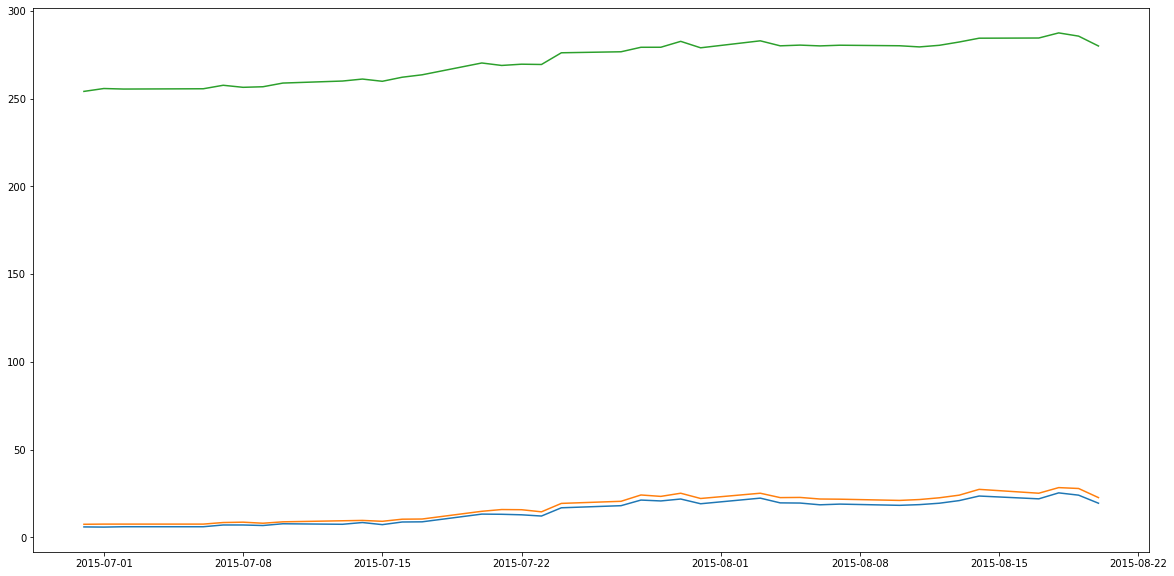

In [121]:
plt.figure(figsize=(20,10))

plt.plot(dates,list(sample.best_bid))
plt.plot(dates,list(sample.best_offer))
plt.plot(dates,list(sample.forward_price))

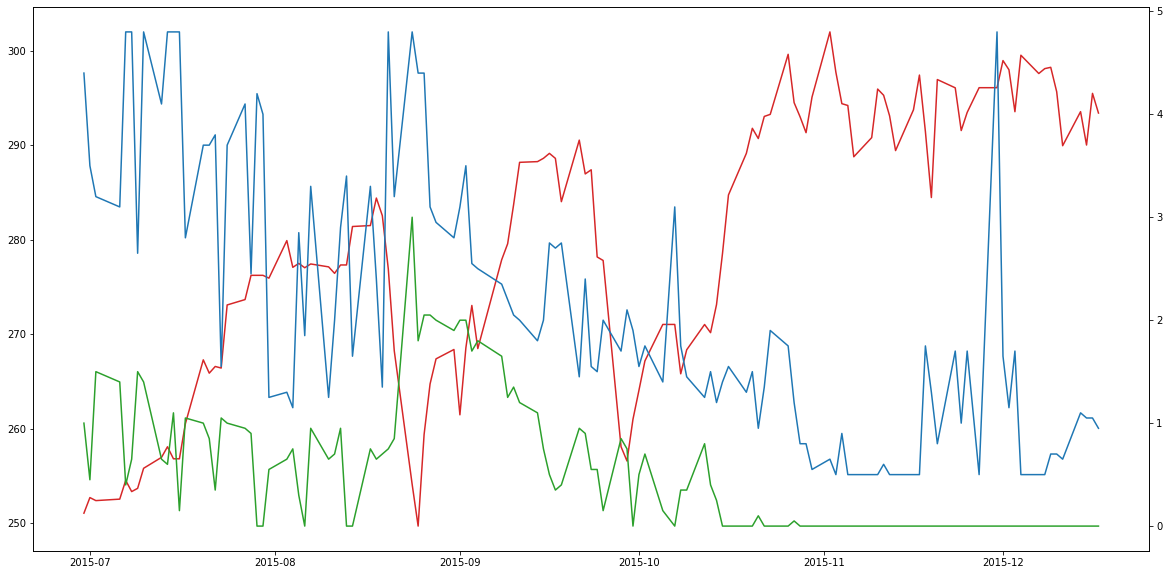

<Figure size 1440x720 with 0 Axes>

In [155]:
# Create some mock data

RED = "tab:red"
GREEN = "tab:green"
BLUE = "tab:blue"
fig, ax1 = plt.subplots(figsize=(20,10))

ax1.plot(dates,list(prices), color=RED)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


ax2.plot(dates,list(sample.best_offer), color=BLUE)
ax2.plot(dates,list(sample.best_bid), color=GREEN)

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.figure(figsize=(20,10))
plt.show()

In [153]:
prices = list(sample.forward_price)
for index in range(len(prices)):
    if prices[index]  < 0:
        prices[index] = prices[index-1]

In [154]:
prices

[251.055938,
 252.707343,
 252.387164,
 252.54262400000002,
 254.52674100000002,
 253.34188199999997,
 253.685416,
 255.80792999999997,
 256.965479,
 258.084209,
 256.812967,
 256.812967,
 260.526783,
 267.28747599999997,
 265.877772,
 266.58572000000004,
 266.419941,
 273.097698,
 273.668115,
 276.233308,
 276.233308,
 276.233308,
 275.933653,
 279.91069500000003,
 277.081051,
 277.49728999999996,
 277.037774,
 277.437348,
 277.129345,
 276.44433300000003,
 277.331208,
 277.331208,
 281.402876,
 281.502707,
 284.413944,
 282.557137,
 276.91621499999997,
 268.246849,
 254.10277599999998,
 249.68913799999999,
 259.385827,
 264.736177,
 267.392304,
 268.383654,
 261.46813599999996,
 268.552929,
 273.04396,
 268.47887799999995,
 277.882631,
 279.575119,
 283.716361,
 288.195693,
 288.270386,
 288.621414,
 289.144613,
 288.61475099999996,
 284.031308,
 290.54612000000003,
 286.96751800000004,
 287.407896,
 278.17778799999996,
 277.807458,
 258.092792,
 256.578825,
 261.000592,
 264.0614470

In [158]:
for elt1, elt2 in zip(dates,list(sample.best_offer)):
    print(elt1,elt2)

2015-06-30 00:00:00 4.4
2015-07-01 00:00:00 3.5
2015-07-02 00:00:00 3.2
2015-07-06 00:00:00 3.1
2015-07-07 00:00:00 4.8
2015-07-08 00:00:00 4.8
2015-07-09 00:00:00 2.65
2015-07-10 00:00:00 4.8
2015-07-13 00:00:00 4.1
2015-07-14 00:00:00 4.8
2015-07-15 00:00:00 4.8
2015-07-16 00:00:00 4.8
2015-07-17 00:00:00 2.8
2015-07-20 00:00:00 3.7
2015-07-21 00:00:00 3.7
2015-07-22 00:00:00 3.8
2015-07-23 00:00:00 1.55
2015-07-24 00:00:00 3.7
2015-07-27 00:00:00 4.1
2015-07-28 00:00:00 2.45
2015-07-29 00:00:00 4.2
2015-07-30 00:00:00 4.0
2015-07-31 00:00:00 1.25
2015-08-03 00:00:00 1.3
2015-08-04 00:00:00 1.15
2015-08-05 00:00:00 2.85
2015-08-06 00:00:00 1.85
2015-08-07 00:00:00 3.3
2015-08-10 00:00:00 1.25
2015-08-11 00:00:00 2.0
2015-08-12 00:00:00 2.9
2015-08-13 00:00:00 3.4
2015-08-14 00:00:00 1.65
2015-08-17 00:00:00 3.3
2015-08-18 00:00:00 2.4
2015-08-19 00:00:00 1.35
2015-08-20 00:00:00 4.8
2015-08-21 00:00:00 3.2
2015-08-24 00:00:00 4.8
2015-08-25 00:00:00 4.4
2015-08-26 00:00:00 4.4
2015-0